# 🔬 Diabetes Prediction: Academic Replication Study
**Author:** Silvio Christian, Joe

---
### ⚠️ METHODOLOGY DISCLAIMER: PLEASE READ
This notebook allows for the replication of a specific research paper on diabetes prediction. To ensure the results match the paper's findings, I have strictly followed their methodology, which includes:

1.  **Global Scaling:** Applying `MinMaxScaler` to the entire dataset before splitting.
2.  **Global SMOTE:** Applying Oversampling to the entire dataset before splitting.

**NOTE:** I am fully aware that this approach introduces **DATA LEAKAGE** and is generally avoided in production environments. However, it is necessary here to reproduce the exact metrics reported in the cited study.

*(For my standard robust implementation, please refer to my other repository)*
---

# 📦 Install Required Libraries

Make sure all required packages are installed. Here, we install `scikit-learn==1.4.2` to ensure compatibility with this notebook.

In [1]:
!pip install -q scikit-learn==1.4.2

# 📥 Import Library

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier 
from xgboost import XGBClassifier
import joblib
import warnings
warnings.filterwarnings("ignore")

# 📊 Load Dataset

In [3]:
df = pd.read_csv("/kaggle/input/pima-indians-diabetes-database/diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


# 🔍 Exploratory Data Analysis

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [6]:
df.sample(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
589,0,73,0,0,0,21.1,0.342,25,0
239,0,104,76,0,0,18.4,0.582,27,0
446,1,100,72,12,70,25.3,0.658,28,0
605,1,124,60,32,0,35.8,0.514,21,0
371,0,118,64,23,89,0.0,1.731,21,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# 🧼 Data Preprocessing

In [9]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [10]:
df.duplicated().sum()

0

## 🚨 Checking for Invalid Zero Values

We'll check how many records contain a value of **0**, which may indicate missing or incorrect data.  
However, we'll **exclude the `Pregnancies` column**, since it's reasonable for someone to have **0 pregnancies**.

In [11]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [12]:
for col in ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']:
    zero_count = (df[col] == 0).sum()
    print(f"Number of 0 values in the '{col}' column: {zero_count}")

Number of 0 values in the 'Glucose' column: 5
Number of 0 values in the 'BloodPressure' column: 35
Number of 0 values in the 'SkinThickness' column: 227
Number of 0 values in the 'Insulin' column: 374
Number of 0 values in the 'BMI' column: 11


In [13]:
col = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[col] = df[col].replace(0, np.nan)

# imputer = SimpleImputer(strategy='mean')
# df[col] = imputer.fit_transform(df[col])

for c in col:
    df[c] = df[c].fillna(df[c].mean())

In [14]:
for col in ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']:
    zero_count = (df[col] == 0).sum()
    print(f"Number of 0 values in the '{col}' column: {zero_count}")

Number of 0 values in the 'Glucose' column: 0
Number of 0 values in the 'BloodPressure' column: 0
Number of 0 values in the 'SkinThickness' column: 0
Number of 0 values in the 'Insulin' column: 0
Number of 0 values in the 'BMI' column: 0


In [15]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1


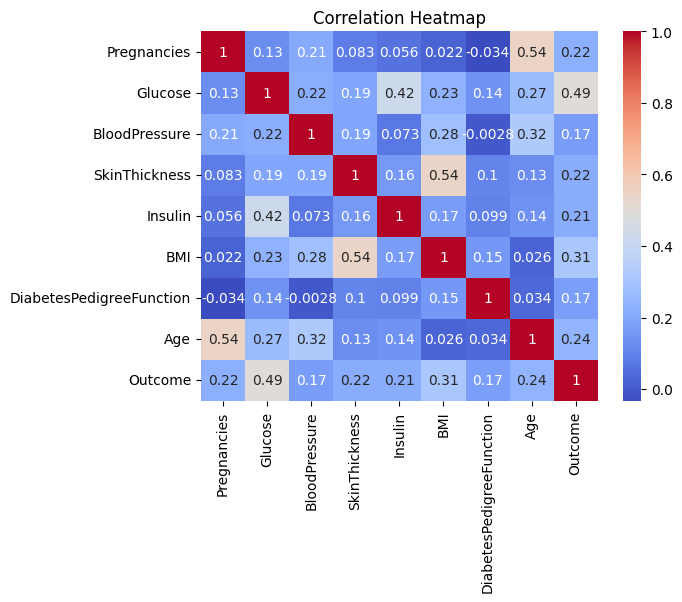

In [16]:
corr = df.corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

## 📏 Feature Scaling (MinMax)

In [17]:
# =============================================================================
# PREPROCESSING STEP: SCALING
# Note: Scaling is applied to the WHOLE dataset (Train + Test) here.
# While this causes data leakage, it is done to strictly adhere to the
# reference paper's preprocessing workflow.
# =============================================================================

scaler = MinMaxScaler()
col = df.drop("Outcome", axis = 1).columns

# Transforming all rows instantly (Global Scaling)
df[col] = scaler.fit_transform(df[col])

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.352941,0.670968,0.489796,0.304348,0.170130,0.314928,0.234415,0.483333,1
1,0.058824,0.264516,0.428571,0.239130,0.170130,0.171779,0.116567,0.166667,0
2,0.470588,0.896774,0.408163,0.240798,0.170130,0.104294,0.253629,0.183333,1
3,0.058824,0.290323,0.428571,0.173913,0.096154,0.202454,0.038002,0.000000,0
4,0.000000,0.600000,0.163265,0.304348,0.185096,0.509202,0.943638,0.200000,1


## 🧪 Splitting Features and Target

In [18]:
X = df.drop("Outcome", axis  = 1)
y = df["Outcome"]

## 🧠 Feature Importance Analysis

We analyze which input features contribute the most to the model’s predictions using the built-in `.feature_importances_` attribute of the Random Forest model.

Normally, in datasets with a large number of features, we might filter and display only the top N features (e.g., top 10) to avoid clutter and focus on the most relevant ones.

However, since this dataset contains fewer than 10 features, we display all of them directly for full transparency.


In [19]:
rf = RandomForestClassifier(n_estimators = 100, random_state=42)
rf.fit(X, y)


feature_importances = pd.DataFrame({
    'features': X.columns, 
    'importances':rf.feature_importances_
})
feature_importances = feature_importances.sort_values(by='importances', ascending = False)
feature_importances

,features,importances
1,Glucose,0.259385
5,BMI,0.167773
7,Age,0.128885
6,DiabetesPedigreeFunction,0.120873
2,BloodPressure,0.086529
0,Pregnancies,0.083596
4,Insulin,0.083356
3,SkinThickness,0.069602


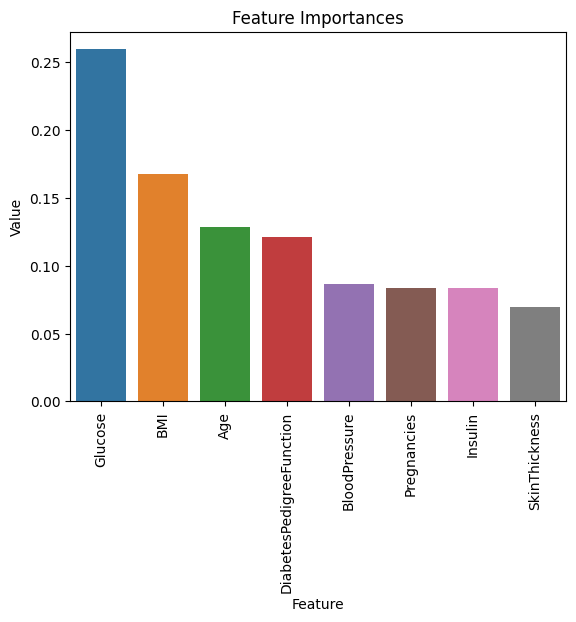

In [20]:
sns.barplot(x = "features", y = "importances", data = feature_importances)
plt.title("Feature Importances")
plt.xlabel("Feature")
plt.ylabel("Value")
plt.xticks(rotation = 90)
plt.show()

# ⚖️ Handling Imbalanced Target Classes

Outcome
0    500
1    268
Name: count, dtype: int64


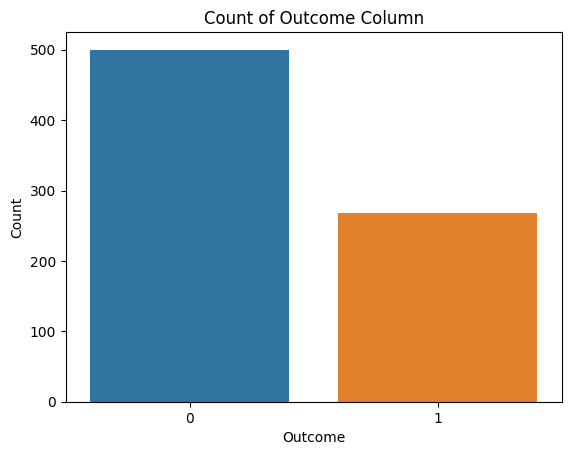

In [21]:
print(y.value_counts())

sns.countplot(x = y)
plt.title("Count of Outcome Column")
plt.xlabel("Outcome")
plt.ylabel("Count")
plt.show()

In [22]:
# =============================================================================
# HANDLING IMBALANCE: SMOTE (Global)
# Note: Synthetic Minority Over-sampling Technique (SMOTE) is applied globally.
# In a real-world scenario, SMOTE should only be applied to X_train.
# Here, it is applied to X to replicate the paper's high accuracy results.
# =============================================================================

smote = SMOTE(random_state=42)

# Resampling the entire feature set
X_resampled, y_resampled = smote.fit_resample(X, y)

Outcome
1    500
0    500
Name: count, dtype: int64


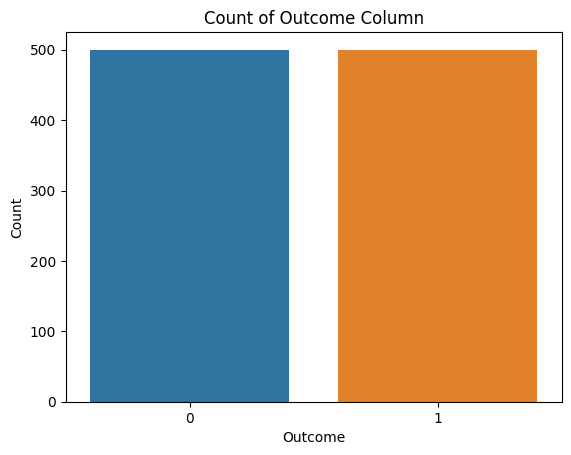

In [23]:
print(y_resampled.value_counts())

sns.countplot(x = y_resampled)
plt.title("Count of Outcome Column")
plt.xlabel("Outcome")
plt.ylabel("Count")
plt.show()

# 🧠 Model Training

## KNN

KNN - Training 80%
 -  Accuracy: 80.0%
 -  Recall: 80%
 -  Precision: 81%


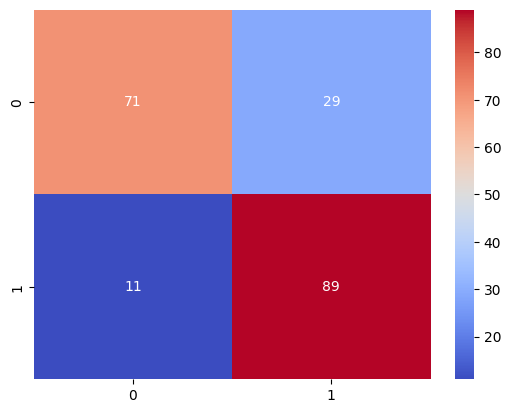

KNN - Training 70%
 -  Accuracy: 79.0%
 -  Recall: 79%
 -  Precision: 80%


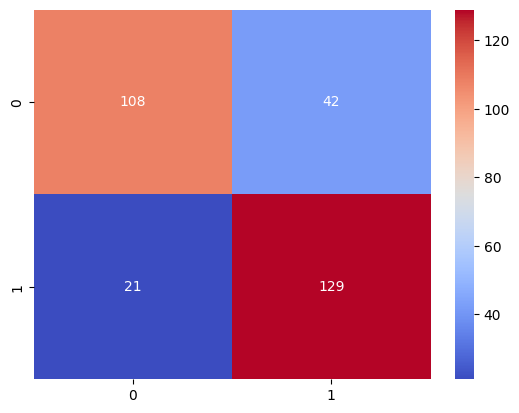

KNN - Training 60%
 -  Accuracy: 77.25%
 -  Recall: 77%
 -  Precision: 78%


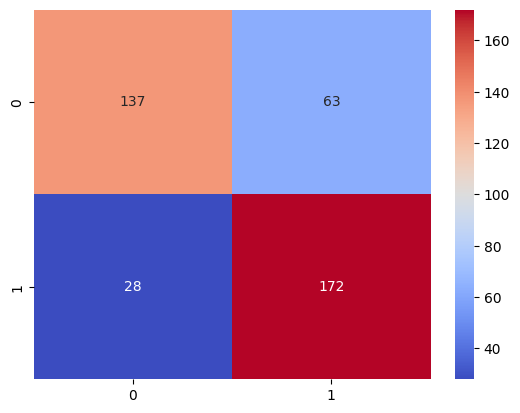

KNN - Training 50%
 -  Accuracy: 77.8%
 -  Recall: 78%
 -  Precision: 79%


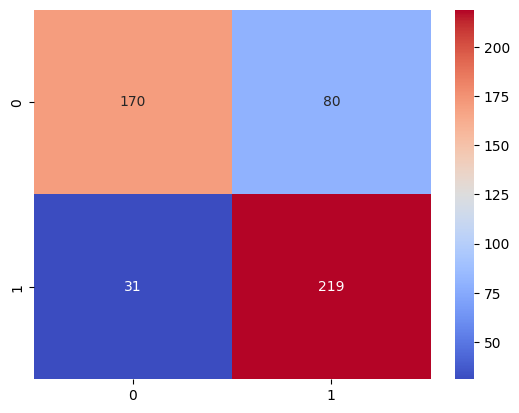

KNN - Training 40%
 -  Accuracy: 77.0%
 -  Recall: 77%
 -  Precision: 78%


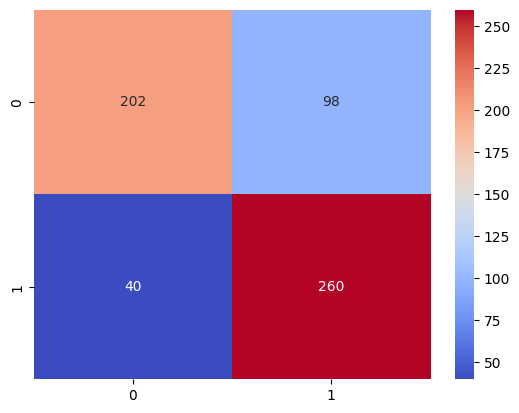

KNN - Training 30%
 -  Accuracy: 72.71%
 -  Recall: 73%
 -  Precision: 74%


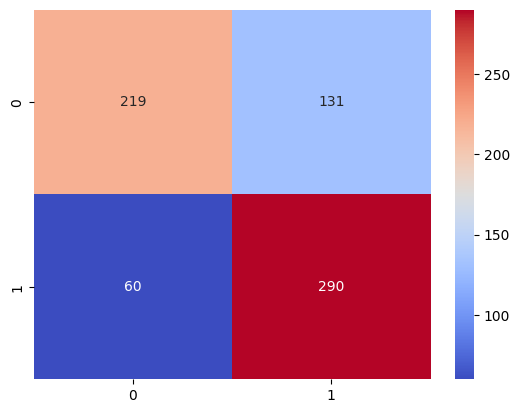

KNN - Training 20%
 -  Accuracy: 73.0%
 -  Recall: 73%
 -  Precision: 74%


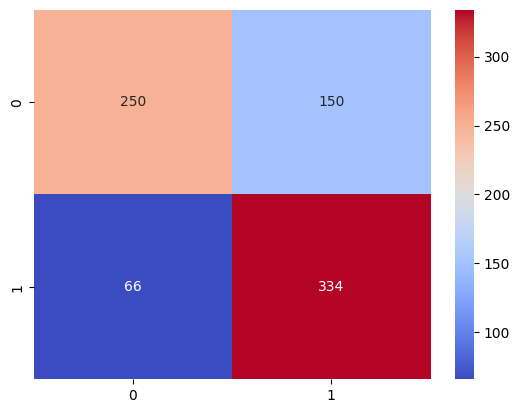

KNN - Training 10%
 -  Accuracy: 71.89%
 -  Recall: 72%
 -  Precision: 72%


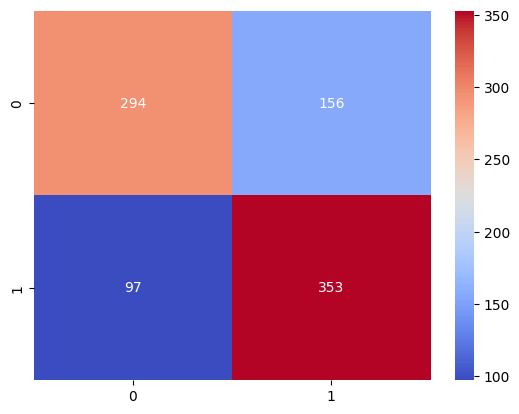

In [24]:
result_knn = {
    "Training %": [],
    "Accuracy": [],
    "Recall": [],
    "Precision": []
}

for test_size in [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]:
    train_percent = (1 - test_size) * 100
    X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=test_size, random_state=42, stratify=y_resampled)

    model_knn = KNeighborsClassifier()

    model_knn.fit(X_train, y_train)

    y_pred_knn = model_knn.predict(X_test)

    acc = round(accuracy_score(y_test, y_pred_knn) * 100, 2)
    recall = round(recall_score(y_test, y_pred_knn, average='macro') * 100)
    precision = round(precision_score(y_test, y_pred_knn, average='macro') * 100)

    print(f"KNN - Training {train_percent:.0f}%")
    print(f" -  Accuracy: {acc}%")
    print(f" -  Recall: {recall}%")
    print(f" -  Precision: {precision}%")

    cm = confusion_matrix(y_test, y_pred_knn)
    sns.heatmap(cm, annot = True, fmt='g', cmap="coolwarm")
    plt.show()
    
    result_knn["Training %"].append(train_percent)
    result_knn["Accuracy"].append(acc)
    result_knn["Recall"].append(recall)
    result_knn["Precision"].append(precision)

In [25]:
knn = pd.DataFrame(result_knn)

print("===DETAIL KNN===")
print(knn)
print(f"Avg Accuracy: {np.mean(knn['Accuracy'])}")
print(f"Avg Recall: {np.mean(knn['Recall'])}")
print(f"Avg Precision: {np.mean(knn['Precision'])}")

===DETAIL KNN===
   Training %  Accuracy  Recall  Precision
0        80.0     80.00      80         81
1        70.0     79.00      79         80
2        60.0     77.25      77         78
3        50.0     77.80      78         79
4        40.0     77.00      77         78
5        30.0     72.71      73         74
6        20.0     73.00      73         74
7        10.0     71.89      72         72
Avg Accuracy: 76.08125
Avg Recall: 76.125
Avg Precision: 77.0


In [26]:
model_knn = KNeighborsClassifier()
cv_scores = cross_val_score(model_knn, X_resampled, y_resampled, cv=10)
print("Cross-validation accuracy (KNN):", cv_scores.mean() * 100)

Cross-validation accuracy (KNN): 79.2


## Naive Bayes

Naive Bayes - Training 80%
 -  Accuracy: 68.5%
 -  Recall: 68%
 -  Precision: 69%


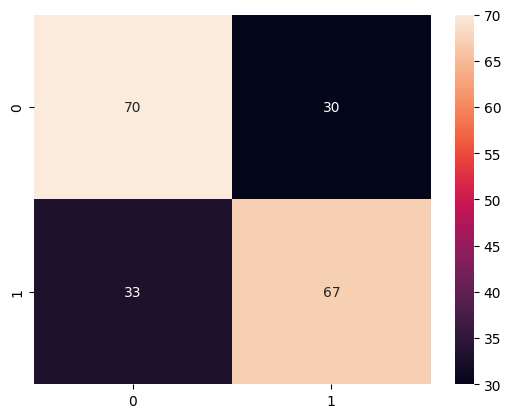

Naive Bayes - Training 70%
 -  Accuracy: 71.0%
 -  Recall: 71%
 -  Precision: 71%


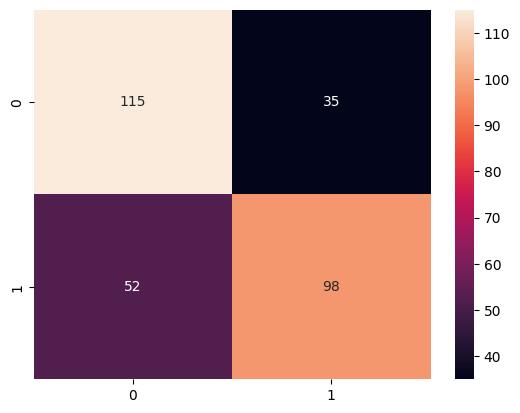

Naive Bayes - Training 60%
 -  Accuracy: 70.5%
 -  Recall: 70%
 -  Precision: 71%


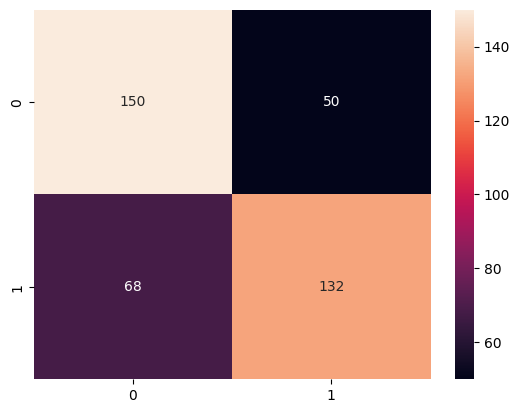

Naive Bayes - Training 50%
 -  Accuracy: 70.0%
 -  Recall: 70%
 -  Precision: 70%


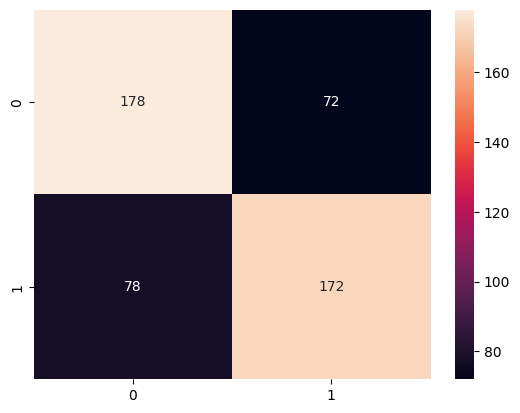

Naive Bayes - Training 40%
 -  Accuracy: 71.83%
 -  Recall: 72%
 -  Precision: 72%


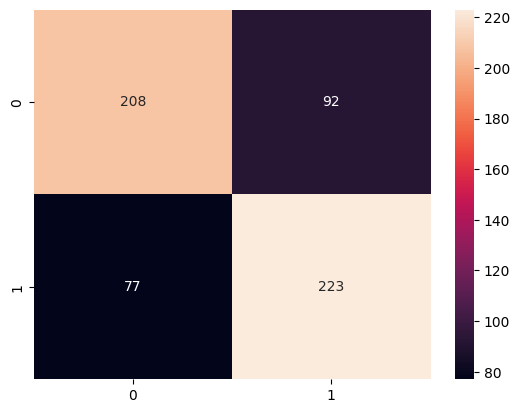

Naive Bayes - Training 30%
 -  Accuracy: 71.0%
 -  Recall: 71%
 -  Precision: 71%


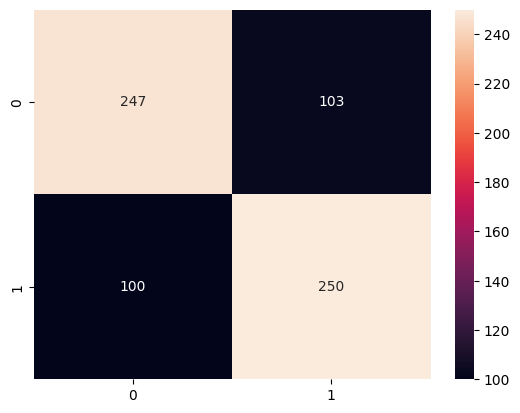

Naive Bayes - Training 20%
 -  Accuracy: 70.0%
 -  Recall: 70%
 -  Precision: 70%


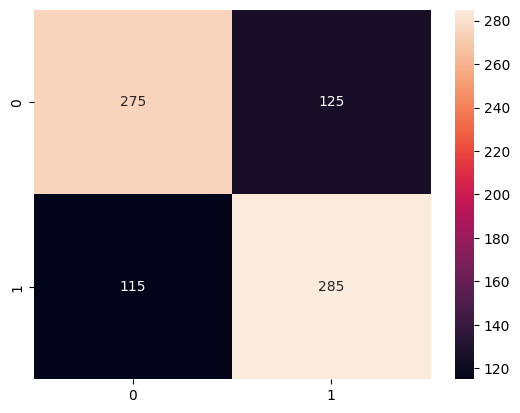

Naive Bayes - Training 10%
 -  Accuracy: 70.89%
 -  Recall: 71%
 -  Precision: 71%


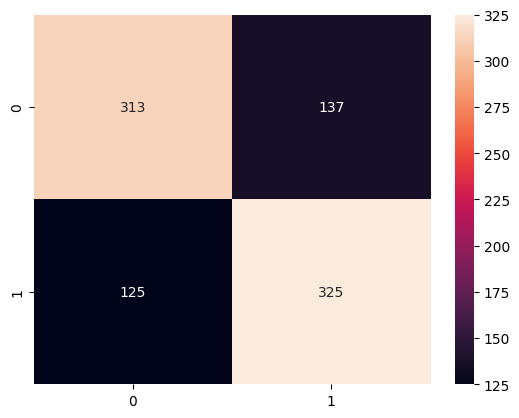

In [27]:
result_nb = {
    "Training %": [],
    "Accuracy": [],
    "Recall": [],
    "Precision": []
}

for test_size in [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]:
    train_percent = (1 - test_size) * 100
    X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=test_size, random_state=42, stratify=y_resampled)

    model_nb = GaussianNB()

    model_nb.fit(X_train, y_train)

    y_pred_nb = model_nb.predict(X_test)

    acc = round(accuracy_score(y_test, y_pred_nb) * 100, 2)
    recall = round(recall_score(y_test, y_pred_nb, average='macro') * 100)
    precision = round(precision_score(y_test, y_pred_nb, average='macro') * 100)
    
    print(f"Naive Bayes - Training {train_percent:.0f}%")
    print(f" -  Accuracy: {acc}%")
    print(f" -  Recall: {recall}%")
    print(f" -  Precision: {precision}%")
    
    cm = confusion_matrix(y_test, y_pred_nb)
    sns.heatmap(cm, annot = True, fmt='g')
    plt.show()


    result_nb["Training %"].append(train_percent)
    result_nb["Accuracy"].append(acc)
    result_nb["Recall"].append(recall)
    result_nb["Precision"].append(precision)

In [28]:
nb = pd.DataFrame(result_nb)

print("===DETAIL NB===")
print(nb)
print(f"Avg Accuracy: {np.mean(nb['Accuracy'])}")
print(f"Avg Recall: {np.mean(nb['Recall'])}")
print(f"Avg Precision: {np.mean(nb['Precision'])}")

===DETAIL NB===
   Training %  Accuracy  Recall  Precision
0        80.0     68.50      68         69
1        70.0     71.00      71         71
2        60.0     70.50      70         71
3        50.0     70.00      70         70
4        40.0     71.83      72         72
5        30.0     71.00      71         71
6        20.0     70.00      70         70
7        10.0     70.89      71         71
Avg Accuracy: 70.465
Avg Recall: 70.375
Avg Precision: 70.625


In [29]:
model_nb = GaussianNB()
cv_scores = cross_val_score(model_nb, X_resampled, y_resampled, cv=10)
print("Cross-validation accuracy (NB):", cv_scores.mean() * 100)

Cross-validation accuracy (NB): 72.30000000000001


## Random Forest

Random Forest - Training 80%
 -  Accuracy: 82.5%
 -  Recall: 82%
 -  Precision: 83%


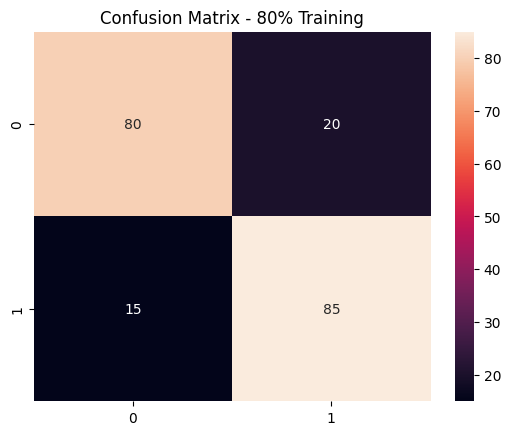

Random Forest - Training 70%
 -  Accuracy: 83.67%
 -  Recall: 84%
 -  Precision: 84%


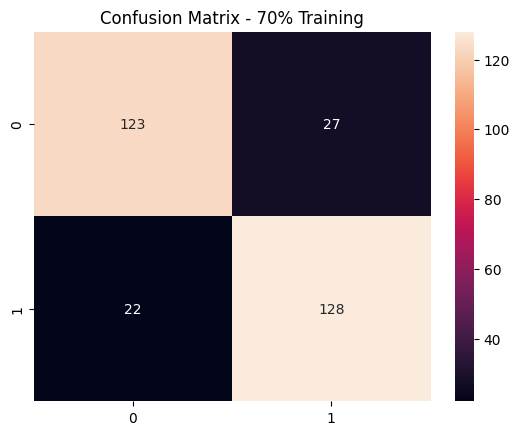

Random Forest - Training 60%
 -  Accuracy: 81.0%
 -  Recall: 81%
 -  Precision: 82%


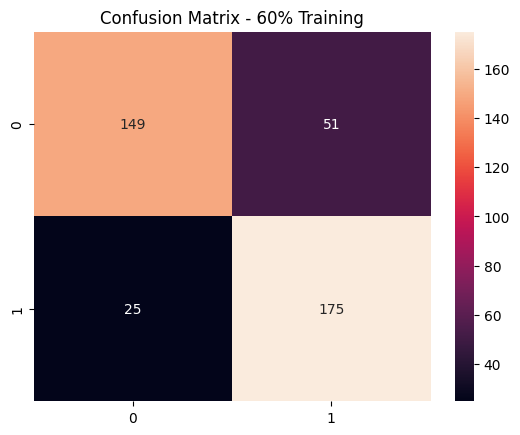

Random Forest - Training 50%
 -  Accuracy: 80.4%
 -  Recall: 80%
 -  Precision: 81%


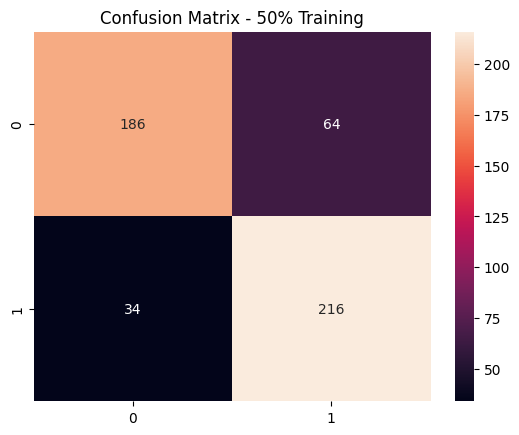

Random Forest - Training 40%
 -  Accuracy: 80.17%
 -  Recall: 80%
 -  Precision: 81%


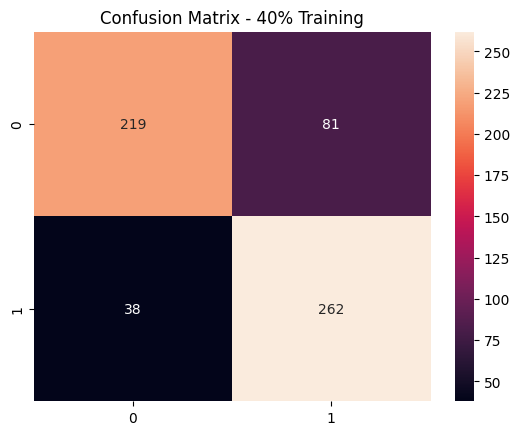

Random Forest - Training 30%
 -  Accuracy: 78.71%
 -  Recall: 79%
 -  Precision: 79%


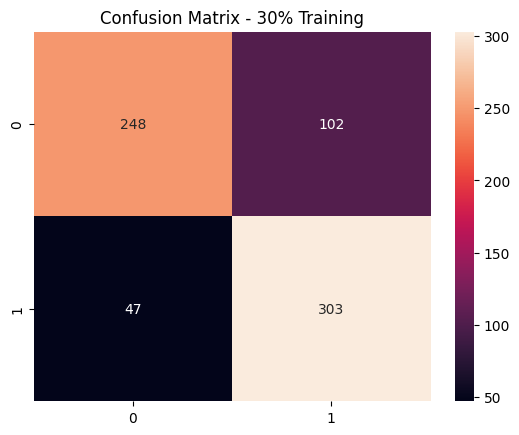

Random Forest - Training 20%
 -  Accuracy: 78.0%
 -  Recall: 78%
 -  Precision: 79%


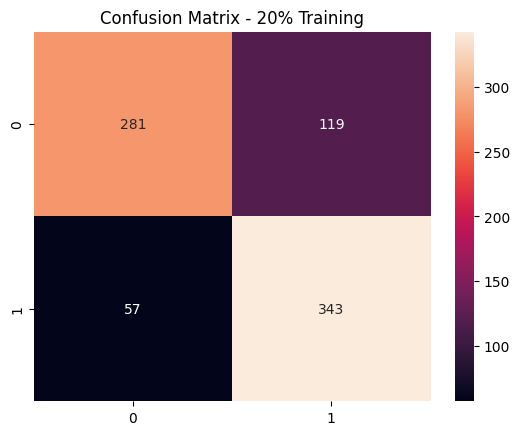

Random Forest - Training 10%
 -  Accuracy: 77.44%
 -  Recall: 77%
 -  Precision: 78%


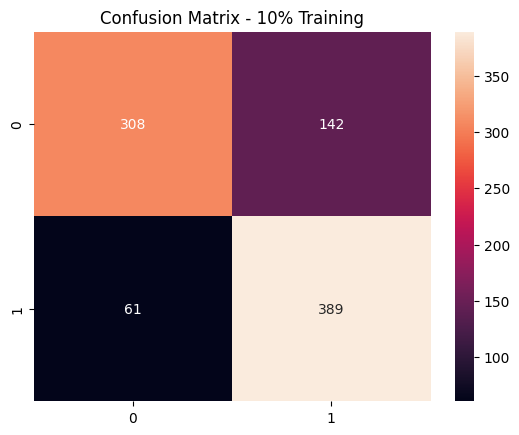

In [30]:
result_rf = {
    "Training %": [],
    "Accuracy": [],
    "Recall": [],
    "Precision": []
}

for test_size in [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]:
    train_percent = (1 - test_size) * 100
    X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=test_size, random_state=42, stratify=y_resampled)

    model_rf = RandomForestClassifier(random_state=42)

    model_rf.fit(X_train, y_train)

    y_pred_rf = model_rf.predict(X_test)

    acc = round(accuracy_score(y_test, y_pred_rf) * 100, 2)
    recall = round(recall_score(y_test, y_pred_rf, average='macro') * 100)
    precision = round(precision_score(y_test, y_pred_rf, average='macro') * 100)
    
    print(f"Random Forest - Training {train_percent:.0f}%")
    print(f" -  Accuracy: {acc}%")
    print(f" -  Recall: {recall}%")
    print(f" -  Precision: {precision}%")
    
    cm = confusion_matrix(y_test, y_pred_rf)
    sns.heatmap(cm, annot=True, fmt='g')
    plt.title(f"Confusion Matrix - {train_percent:.0f}% Training")
    plt.show()

    result_rf["Training %"].append(train_percent)
    result_rf["Accuracy"].append(acc)
    result_rf["Recall"].append(recall)
    result_rf["Precision"].append(precision)

In [31]:
rf = pd.DataFrame(result_rf)

print("===DETAIL RF===")
print(rf)
print(f"Avg Accuracy: {np.mean(rf['Accuracy'])}")
print(f"Avg Recall: {np.mean(rf['Recall'])}")
print(f"Avg Precision: {np.mean(rf['Precision'])}")

===DETAIL RF===
   Training %  Accuracy  Recall  Precision
0        80.0     82.50      82         83
1        70.0     83.67      84         84
2        60.0     81.00      81         82
3        50.0     80.40      80         81
4        40.0     80.17      80         81
5        30.0     78.71      79         79
6        20.0     78.00      78         79
7        10.0     77.44      77         78
Avg Accuracy: 80.23625000000001
Avg Recall: 80.125
Avg Precision: 80.875


In [32]:
model_rf = RandomForestClassifier(random_state=42)
cv_scores = cross_val_score(model_rf, X_resampled, y_resampled, cv=10)
print("Cross-validation accuracy (RF):", cv_scores.mean() * 100)

Cross-validation accuracy (RF): 81.8


## Logistic Regression

Logistic Regression - Training 80%
 -  Accuracy: 74.0%
 -  Recall: 74%
 -  Precision: 74%


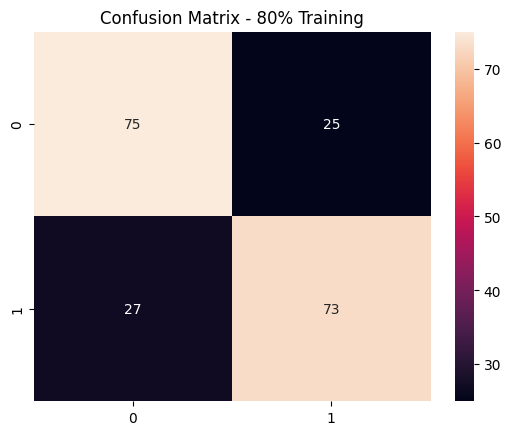

Logistic Regression - Training 70%
 -  Accuracy: 76.0%
 -  Recall: 76%
 -  Precision: 76%


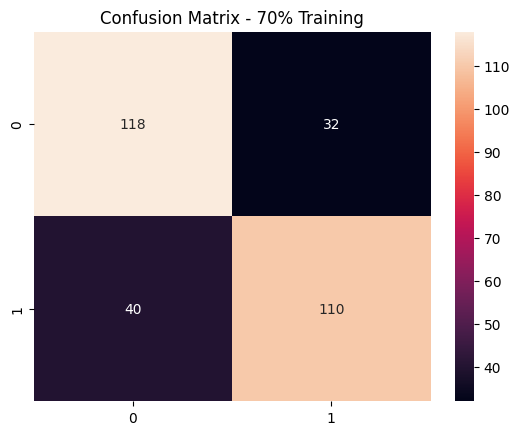

Logistic Regression - Training 60%
 -  Accuracy: 75.5%
 -  Recall: 76%
 -  Precision: 76%


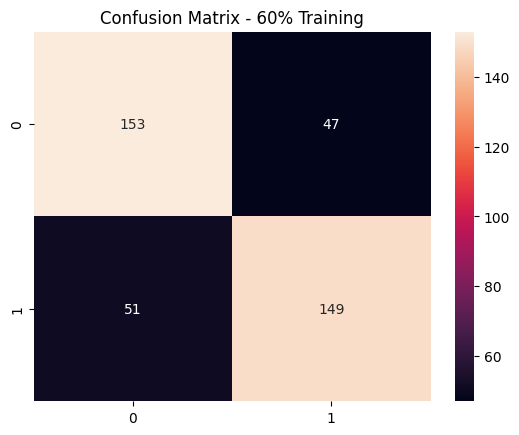

Logistic Regression - Training 50%
 -  Accuracy: 73.4%
 -  Recall: 73%
 -  Precision: 73%


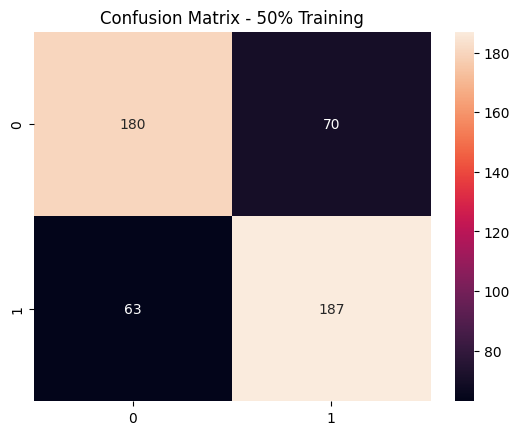

Logistic Regression - Training 40%
 -  Accuracy: 74.0%
 -  Recall: 74%
 -  Precision: 74%


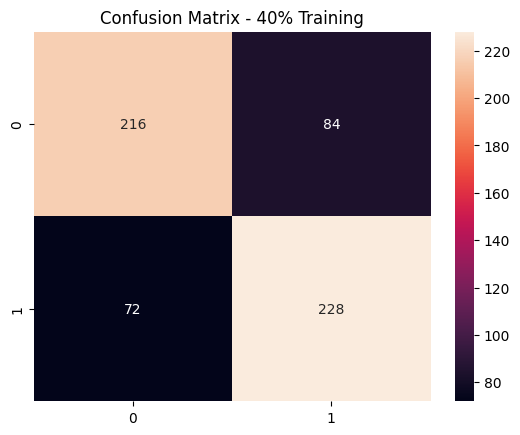

Logistic Regression - Training 30%
 -  Accuracy: 74.43%
 -  Recall: 74%
 -  Precision: 74%


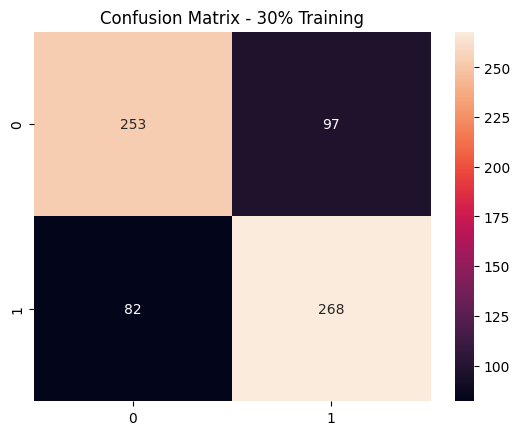

Logistic Regression - Training 20%
 -  Accuracy: 74.88%
 -  Recall: 75%
 -  Precision: 75%


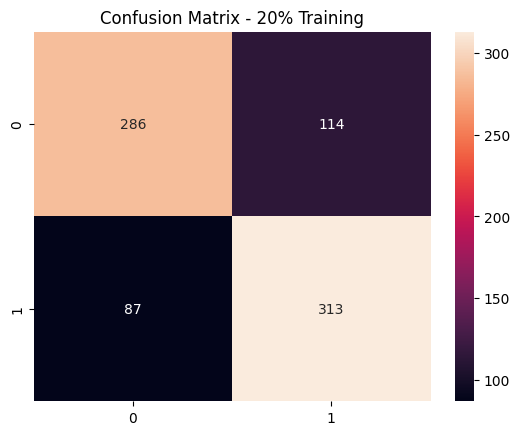

Logistic Regression - Training 10%
 -  Accuracy: 73.89%
 -  Recall: 74%
 -  Precision: 74%


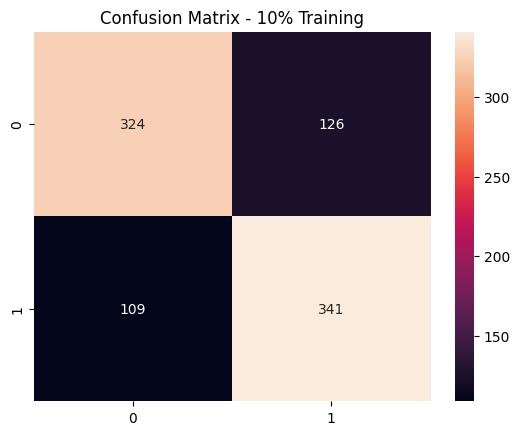

In [33]:
result_lr = {
    "Training %": [],
    "Accuracy": [],
    "Recall": [],
    "Precision": []
}

for test_size in [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]:
    train_percent = (1 - test_size) * 100
    X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=test_size, random_state=42, stratify=y_resampled)

    model_lr = LogisticRegression(max_iter=1000)  # Tambah max_iter biar ga warning

    model_lr.fit(X_train, y_train)

    y_pred_lr = model_lr.predict(X_test)

    acc = round(accuracy_score(y_test, y_pred_lr) * 100, 2)
    recall = round(recall_score(y_test, y_pred_lr, average='macro') * 100)
    precision = round(precision_score(y_test, y_pred_lr, average='macro') * 100)
    
    print(f"Logistic Regression - Training {train_percent:.0f}%")
    print(f" -  Accuracy: {acc}%")
    print(f" -  Recall: {recall}%")
    print(f" -  Precision: {precision}%")
    
    cm = confusion_matrix(y_test, y_pred_lr)
    sns.heatmap(cm, annot=True, fmt='g')
    plt.title(f"Confusion Matrix - {train_percent:.0f}% Training")
    plt.show()

    result_lr["Training %"].append(train_percent)
    result_lr["Accuracy"].append(acc)
    result_lr["Recall"].append(recall)
    result_lr["Precision"].append(precision)

In [34]:
lr = pd.DataFrame(result_lr)

print("===DETAIL LOGISTIC REGRESSION===")
print(lr)
print(f"Avg Accuracy: {np.mean(lr['Accuracy'])}")
print(f"Avg Recall: {np.mean(lr['Recall'])}")
print(f"Avg Precision: {np.mean(lr['Precision'])}")

===DETAIL LOGISTIC REGRESSION===
   Training %  Accuracy  Recall  Precision
0        80.0     74.00      74         74
1        70.0     76.00      76         76
2        60.0     75.50      76         76
3        50.0     73.40      73         73
4        40.0     74.00      74         74
5        30.0     74.43      74         74
6        20.0     74.88      75         75
7        10.0     73.89      74         74
Avg Accuracy: 74.51249999999999
Avg Recall: 74.5
Avg Precision: 74.5


In [35]:
model_lr = LogisticRegression(max_iter=1000)
cv_scores = cross_val_score(model_lr, X_resampled, y_resampled, cv=10)
print("Cross-validation accuracy (Logistic Regression):", cv_scores.mean() * 100)

Cross-validation accuracy (Logistic Regression): 74.2


## XGBOOST

XGBoost - Training 80%
 -  Accuracy: 81.0%
 -  Recall: 81%
 -  Precision: 81%


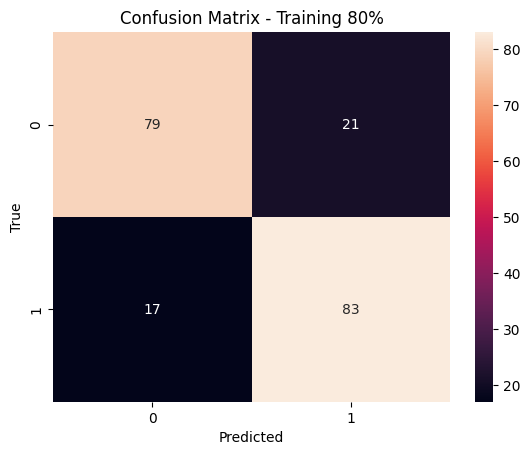

XGBoost - Training 70%
 -  Accuracy: 80.0%
 -  Recall: 80%
 -  Precision: 80%


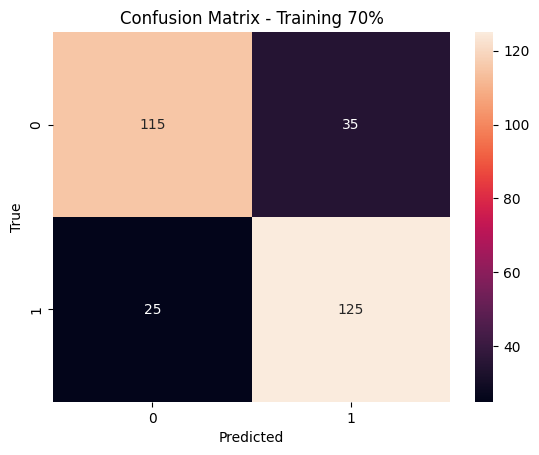

XGBoost - Training 60%
 -  Accuracy: 76.0%
 -  Recall: 76%
 -  Precision: 76%


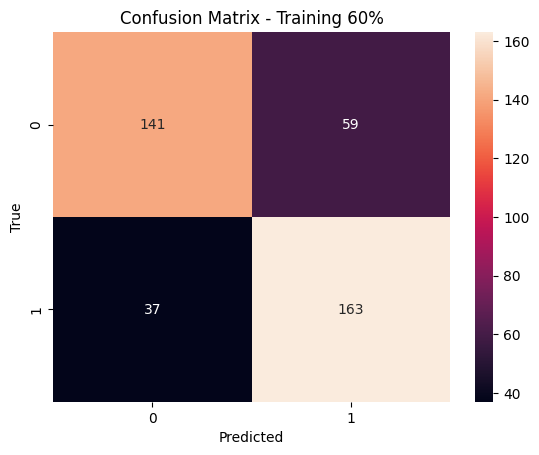

XGBoost - Training 50%
 -  Accuracy: 77.0%
 -  Recall: 77%
 -  Precision: 77%


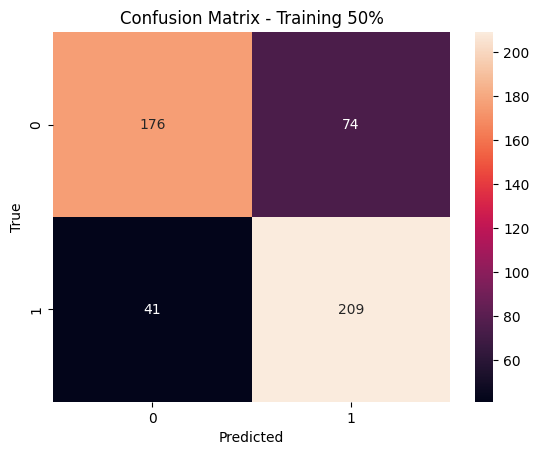

XGBoost - Training 40%
 -  Accuracy: 77.17%
 -  Recall: 77%
 -  Precision: 78%


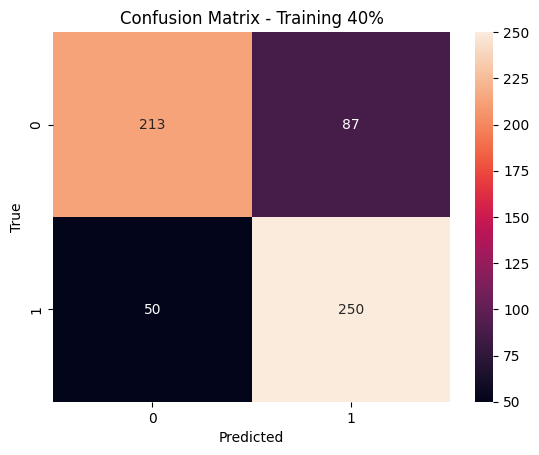

XGBoost - Training 30%
 -  Accuracy: 75.86%
 -  Recall: 76%
 -  Precision: 77%


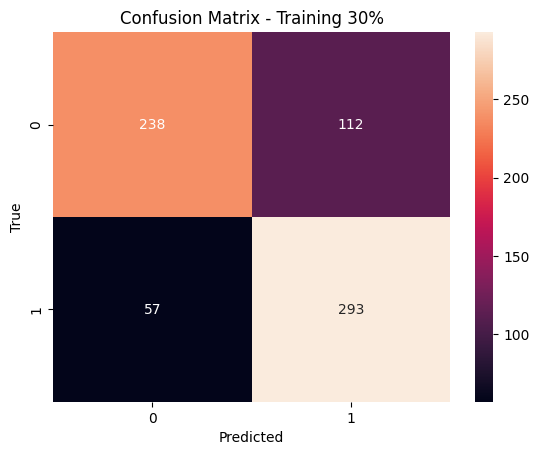

XGBoost - Training 20%
 -  Accuracy: 77.25%
 -  Recall: 77%
 -  Precision: 78%


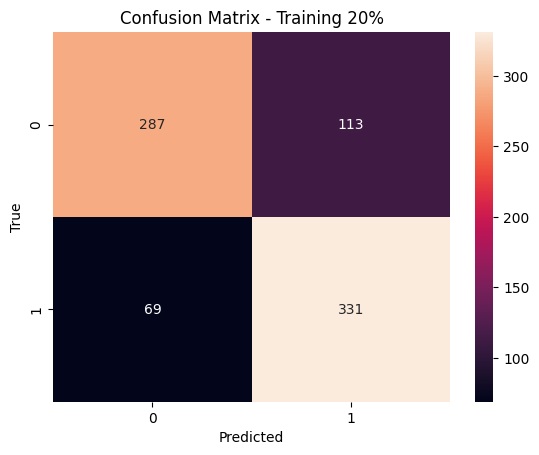

XGBoost - Training 10%
 -  Accuracy: 74.78%
 -  Recall: 75%
 -  Precision: 75%


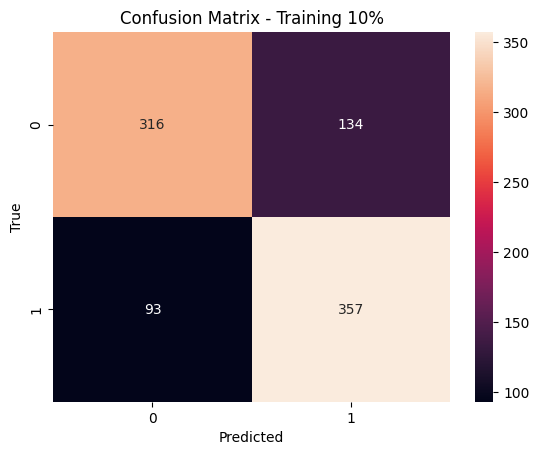

In [36]:
result_xgb = {
    "Training %": [],
    "Accuracy": [],
    "Recall": [],
    "Precision": []
}
 
for test_size in [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]:
    train_percent = (1 - test_size) * 100
    X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=test_size, random_state=42, stratify=y_resampled)

    model_xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')  # setting penting biar ga warning

    model_xgb.fit(X_train, y_train)

    y_pred_xgb = model_xgb.predict(X_test)

    acc = round(accuracy_score(y_test, y_pred_xgb) * 100, 2)
    recall = round(recall_score(y_test, y_pred_xgb, average='macro') * 100)
    precision = round(precision_score(y_test, y_pred_xgb, average='macro') * 100)
    
    print(f"XGBoost - Training {train_percent:.0f}%")
    print(f" -  Accuracy: {acc}%")
    print(f" -  Recall: {recall}%")
    print(f" -  Precision: {precision}%")
    
    cm = confusion_matrix(y_test, y_pred_xgb)
    sns.heatmap(cm, annot=True, fmt='g')
    plt.title(f"Confusion Matrix - Training {train_percent:.0f}%")
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

    result_xgb["Training %"].append(train_percent)
    result_xgb["Accuracy"].append(acc)
    result_xgb["Recall"].append(recall)
    result_xgb["Precision"].append(precision)

In [37]:
xgb_df = pd.DataFrame(result_xgb)

print("===DETAIL XGBOOST===")
print(xgb_df)
print(f"Avg Accuracy: {np.mean(xgb_df['Accuracy'])}")
print(f"Avg Recall: {np.mean(xgb_df['Recall'])}")
print(f"Avg Precision: {np.mean(xgb_df['Precision'])}")

===DETAIL XGBOOST===
   Training %  Accuracy  Recall  Precision
0        80.0     81.00      81         81
1        70.0     80.00      80         80
2        60.0     76.00      76         76
3        50.0     77.00      77         77
4        40.0     77.17      77         78
5        30.0     75.86      76         77
6        20.0     77.25      77         78
7        10.0     74.78      75         75
Avg Accuracy: 77.3825
Avg Recall: 77.375
Avg Precision: 77.75


In [38]:
model_xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
cv_scores = cross_val_score(model_xgb, X_resampled, y_resampled, cv=10)
print("Cross-validation accuracy (XGBoost):", cv_scores.mean() * 100)

Cross-validation accuracy (XGBoost): 80.1


# 🎯 Model Evaluation

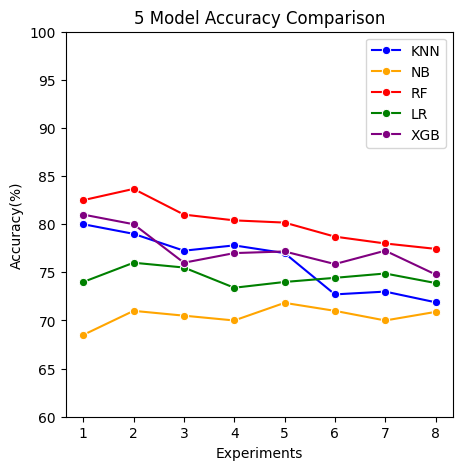

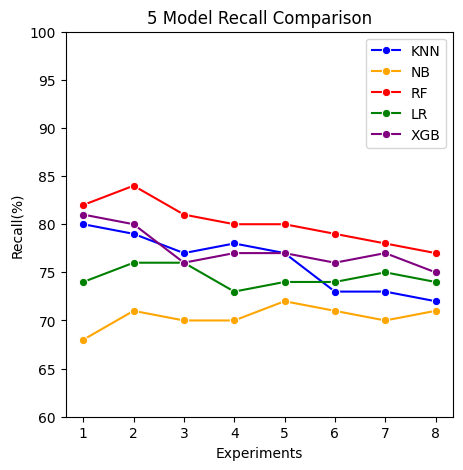

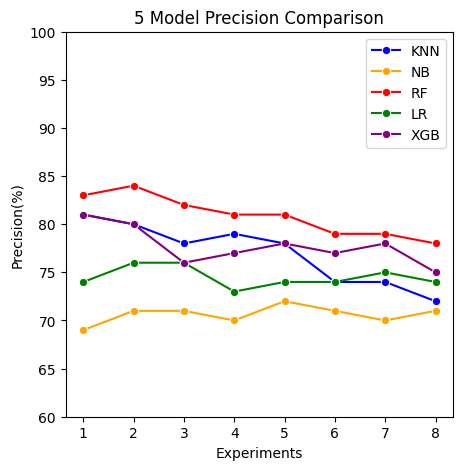

In [39]:
for type in ["Accuracy", "Recall", "Precision"]:
    plt.figure(figsize = (5, 5))
    sns.lineplot(x = range(1, len(result_knn[type]) + 1), y = result_knn[type], marker = "o", color = "blue", label = "KNN")
    sns.lineplot(x = range(1, len(result_nb[type]) + 1), y = result_nb[type], marker = "o", color = "orange", label = "NB")
    sns.lineplot(x = range(1, len(result_nb[type]) + 1), y = result_rf[type], marker = "o", color = "red", label = "RF")
    sns.lineplot(x = range(1, len(result_nb[type]) + 1), y = result_lr[type], marker = "o", color = "green", label = "LR")
    sns.lineplot(x = range(1, len(result_nb[type]) + 1), y = result_xgb[type], marker = "o", color = "purple", label = "XGB")
    plt.title(f"5 Model {type} Comparison")
    plt.xlabel("Experiments")
    plt.ylabel(f"{type}(%)")
    plt.ylim(60, 100)
    plt.legend()
    plt.show()

 -  Accuracy: 83.67%
 -  Recall: 84%
 -  Precision: 84%


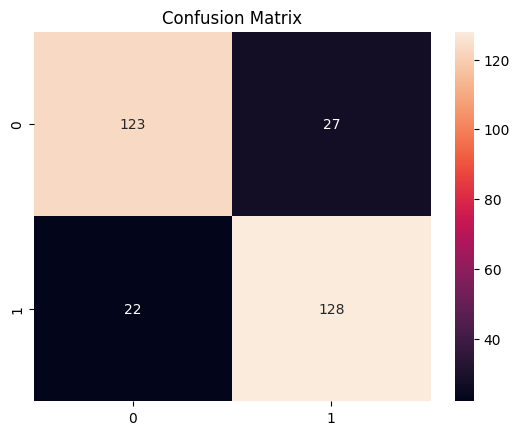

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42, stratify=y_resampled)

model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)

y_pred_rf = model_rf.predict(X_test)

acc = round(accuracy_score(y_test, y_pred_rf) * 100, 2)
recall = round(recall_score(y_test, y_pred_rf, average='macro') * 100)
precision = round(precision_score(y_test, y_pred_rf, average='macro') * 100)
print(f" -  Accuracy: {acc}%")
print(f" -  Recall: {recall}%")
print(f" -  Precision: {precision}%")

cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot=True, fmt='g')
plt.title(f"Confusion Matrix")
plt.show()

# 🚀 Try It Yourself!

In [41]:
# print("Enter patient data for diabetes prediction:\n")

# name = str(input("Patient name: "))
# pregnancies = float(input("Number of pregnancies: "))
# glucose = float(input("Glucose level: "))
# blood_pressure = float(input("Blood pressure: "))
# skin_thickness = float(input("Skin thickness: "))
# insulin = float(input("Insulin level: "))
# bmi = float(input("Body Mass Index (BMI): "))
# dpf = float(input("Diabetes Pedigree Function (DPF): "))
# age = float(input("Age: "))

# input_value = [[pregnancies, glucose, blood_pressure, skin_thickness, insulin, bmi, dpf, age]]
# # example: [[6, 148, 72, 35, 168, 43.1, 2.288, 33]]

# # Make sure preprocessing is applied
# input_data = scaler.transform(input_value)

# # Predict using the trained model
# prediction = model_rf.predict(input_data)[0]
# result = "Diabetic" if prediction == 1 else "Non-Diabetic"

# print("\n\n\n\nPrediction Result:")
# print(f"Name: {name}")
# print(f"Prediction: {result}")

In [42]:
# ### print("Enter patient data for diabetes prediction:\n")

# name = str(input("Patient name: "))
# pregnancies = float(input("Number of pregnancies: "))
# glucose = float(input("Glucose level: "))
# blood_pressure = float(input("Blood pressure: "))
# skin_thickness = float(input("Skin thickness: "))
# insulin = float(input("Insulin level: "))
# bmi = float(input("Body Mass Index (BMI): "))
# dpf = float(input("Diabetes Pedigree Function (DPF): "))
# age = float(input("Age: "))

# input_value = [[pregnancies, glucose, blood_pressure, skin_thickness, insulin, bmi, dpf, age]]
# # example: [[2, 100, 72, 23, 85, 27.5, 0.35, 28]]

# # Make sure preprocessing is applied
# input_data = scaler.transform(input_value)

# # Predict using the trained model
# prediction = model_rf.predict(input_data)[0]
# result = "Diabetic" if prediction == 1 else "Non-Diabetic"

# print("\n\n\n\nPrediction Result:")
# print(f"Name: {name}")
# print(f"Prediction: {result}")

# 💾 Save Model

In [43]:
# 🔹 Save the Scaler
joblib.dump(scaler, "scaler.joblib")
print("✅ Scaler saved successfully!")

# 🔹 Save the Trained Model
joblib.dump(model_rf, "model_rf.joblib")
print("✅ Model saved successfully! 🔥")

✅ Scaler saved successfully!
✅ Model saved successfully! 🔥


# 🩺 Diabetes Prediction Project
### 👨‍💻 Authors:
- **Silvio Christian**
- **Stefanus Loveniko P.S.**

📅 Date: August 2025  
🔗 Project Type: Machine Learning Classification  